In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv("C:\\Users\\sreel\\OneDrive\\Desktop\\Project\\Prodigy Task 5\\US_Accidents_Dec20_Updated.csv")

C:\Users\sreel\AppData\Local\Temp\ipykernel_21264\1955683880.py:2: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\sreel\\OneDrive\\Desktop\\Project\\Prodigy Task 5\\US_Accidents_Dec20_Updated.csv")


In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42768 entries, 0 to 42767
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     42768 non-null  object 
 1   Severity               42768 non-null  int64  
 2   Start_Time             42768 non-null  object 
 3   End_Time               42768 non-null  object 
 4   Start_Lat              42768 non-null  float64
 5   Start_Lng              42767 non-null  float64
 6   End_Lat                38562 non-null  float64
 7   End_Lng                38562 non-null  float64
 8   Distance(mi)           42767 non-null  float64
 9   Description            42767 non-null  object 
 10  Number                 14888 non-null  float64
 11  Street                 42767 non-null  object 
 12  Side                   42767 non-null  object 
 13  City                   42763 non-null  object 
 14  County                 42767 non-null  object 
 15  St

In [5]:
print(df.describe())

           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  42768.000000  42768.000000  42767.000000  38562.000000  38562.000000   
mean       2.289632     36.495281    -96.397656     36.474763    -96.128667   
std        0.555169      4.997337     17.744411      4.995932     17.633613   
min        1.000000     24.574811   -124.486270     24.571389   -124.486270   
25%        2.000000     33.631295   -117.810017     33.603940   -117.658536   
50%        2.000000     36.069109    -91.192314     36.019261    -91.060528   
75%        3.000000     40.316956    -80.843825     40.268014    -80.824167   
max        4.000000     48.997581    -68.365955     48.997581    -68.365405   

       Distance(mi)         Number  Temperature(F)  Wind_Chill(F)  \
count  42767.000000   14888.000000    41785.000000   25171.000000   
mean       0.395864    6686.169130       61.049345      55.007914   
std        1.608695   14504.608766       18.413176      22.212886   
min        0

In [6]:
# Data Cleaning: Handle missing or corrupted data
# Replace '#####' in your dataset with NaN and drop missing values
df.replace('#####', pd.NA, inplace=True)
df.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng', 'Temperature(F)'], inplace=True)

In [7]:
# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [8]:
# Extract hour from 'Start_Time' for time of day analysis
df['Hour'] = df['Start_Time'].dt.hour

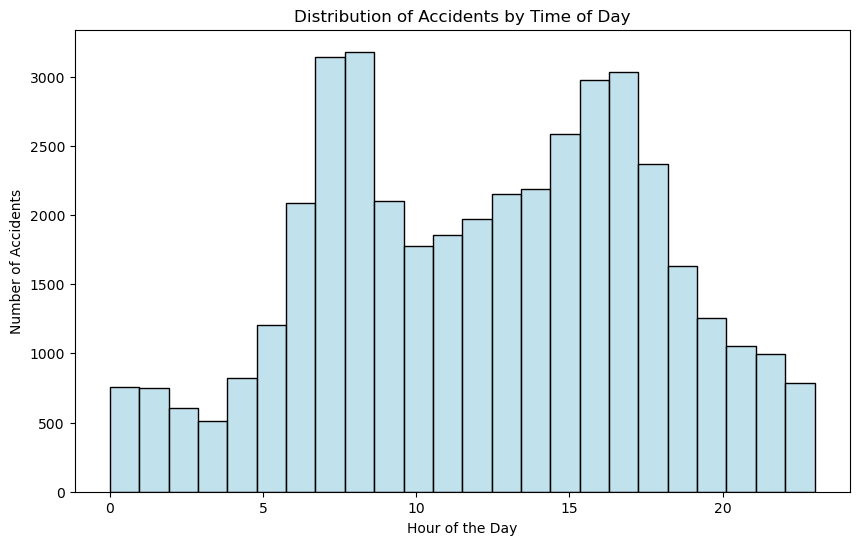

In [11]:
# Analyze and visualize patterns related to time of day
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='lightblue')
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

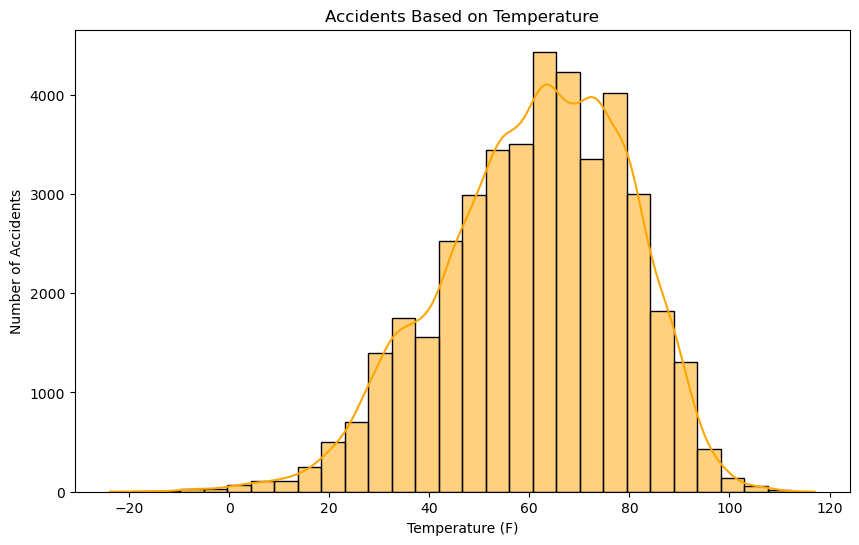

In [12]:
# Analyze accidents by temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature(F)'], bins=30, kde=True, color='orange')
plt.title('Accidents Based on Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Accidents')
plt.show()

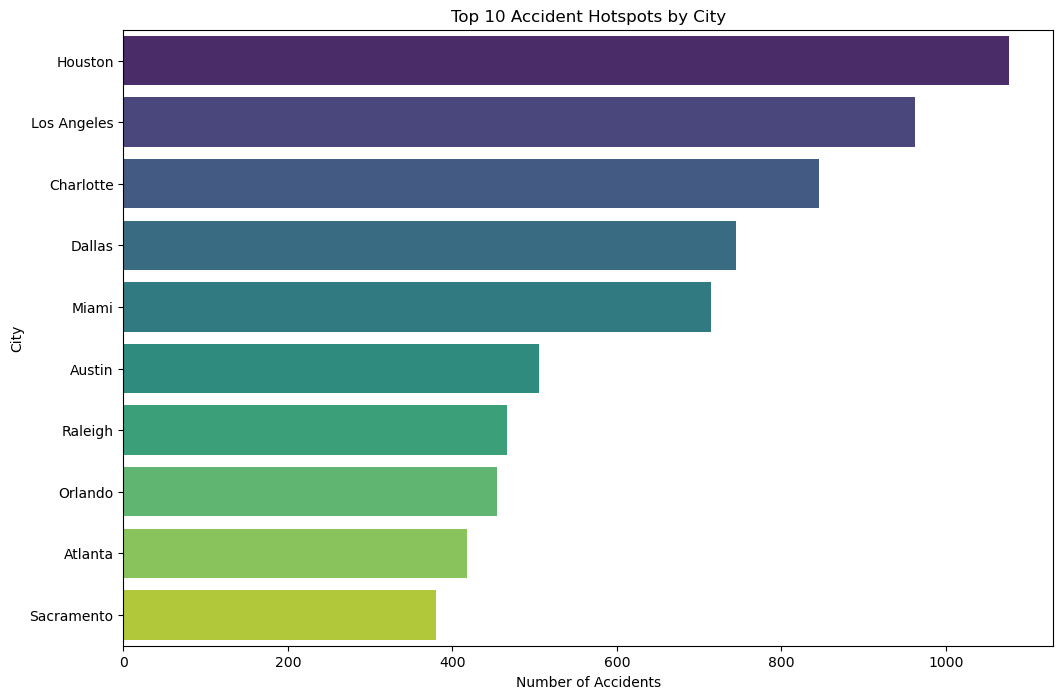

In [13]:
# Accident Hotspot Visualization (City-wise)
plt.figure(figsize=(12, 8))
city_counts = df['City'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Top 10 Accident Hotspots by City')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()

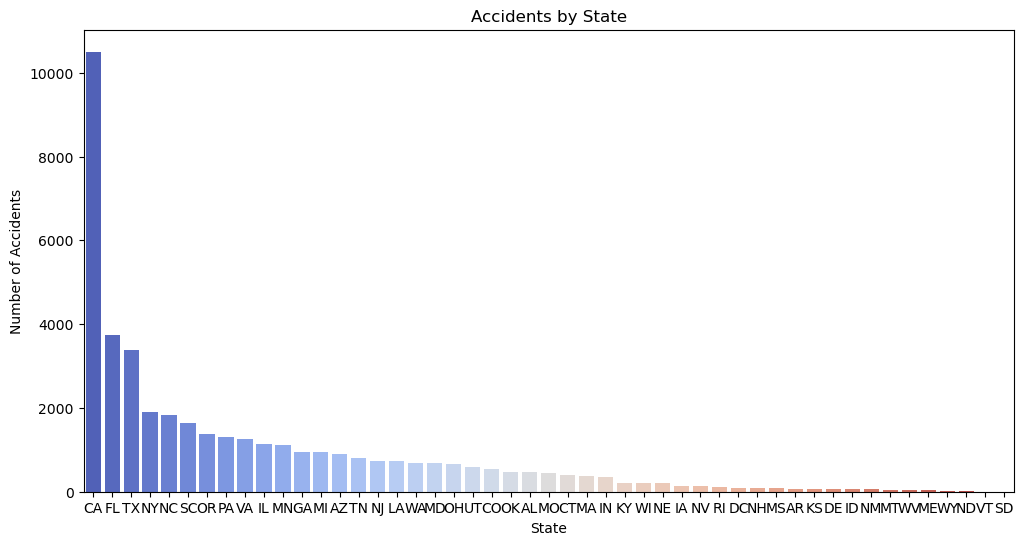

In [14]:
# Analyze accidents by state
plt.figure(figsize=(12, 6))
state_counts = df['State'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')
plt.title('Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

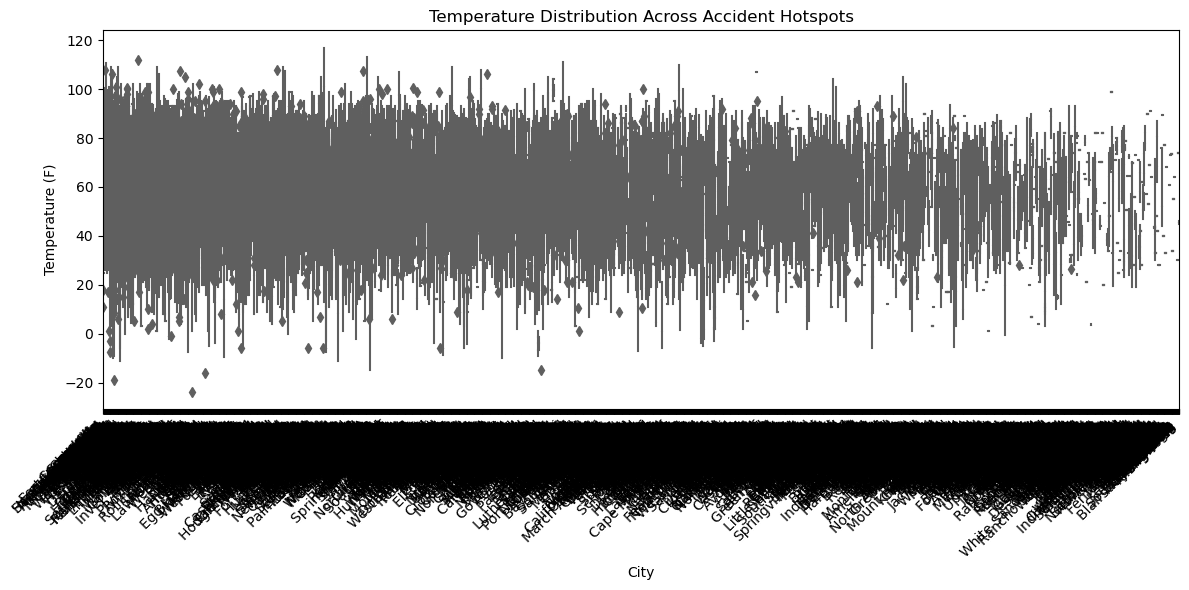

In [17]:
# Analyze accidents by road conditions (assumed to be represented by temperature as a proxy)
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Temperature(F)', data=df, palette='Set3')
plt.title('Temperature Distribution Across Accident Hotspots')
plt.xlabel('City')
plt.ylabel('Temperature (F)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()